In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
#model/data parameters
num_classes=10
input_shape=(28,28,1)

In [ ]:
#the data split between train and test sets
(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#scale images to the[0,1]range
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

In [ ]:
#making sure images have shape (28,28,1)
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)
print("x_train shape:",x_train.shape)
print(x_train.shape[0],"train samples")
print(x_test.shape[0],"test samples")


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
X_train = np.reshape(x_train, (-1, 28, 28, 1))
x_test = np.reshape(x_test, (-1, 28, 28, 1))

In [ ]:
#converting class vectors to binary class matrices
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)
print(y_train[1:5])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
#model
from tensorflow.keras.models import Sequential
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten


batch_size = 128
epochs = 15

# Reshape the model's output
model.add(Flatten())

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
422/422 [==============================] - 42s 96ms/step - loss: 0.6944 - accuracy: 0.7497 - precision: 0.8492 - recall: 0.6543 - val_loss: 0.4546 - val_accuracy: 0.8397 - val_precision: 0.8891 - val_recall: 0.7830
Epoch 2/15
422/422 [==============================] - 31s 73ms/step - loss: 0.4630 - accuracy: 0.8341 - precision: 0.8757 - recall: 0.7884 - val_loss: 0.3831 - val_accuracy: 0.8662 - val_precision: 0.9028 - val_recall: 0.8268
Epoch 3/15
422/422 [==============================] - 30s 71ms/step - loss: 0.4104 - accuracy: 0.8542 - precision: 0.8869 - recall: 0.8198 - val_loss: 0.3710 - val_accuracy: 0.8697 - val_precision: 0.9028 - val_recall: 0.8393
Epoch 4/15
422/422 [==============================] - 31s 74ms/step - loss: 0.3828 - accuracy: 0.8629 - precision: 0.8920 - recall: 0.8332 - val_loss: 0.3416 - val_accuracy: 0.8778 - val_precision: 0.9071 - val_recall: 0.8530
Epoch 5/15
422/422 [==============================] - 32s 77ms/step - loss: 0.3596 - accuracy: 0

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])


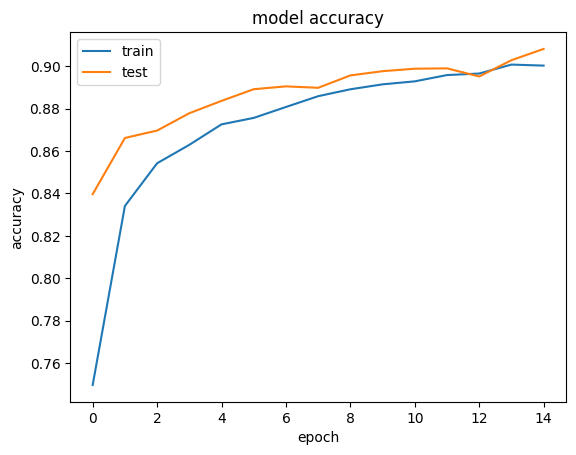

In [ ]:
import matplotlib.pyplot as plt
print(history.history.keys())
#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'])++
plt.show()

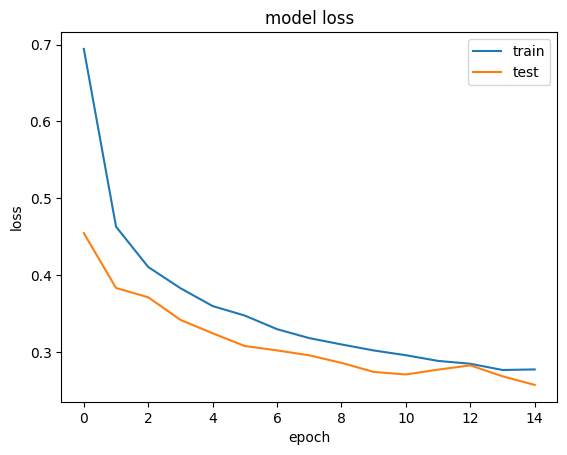

In [ ]:
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

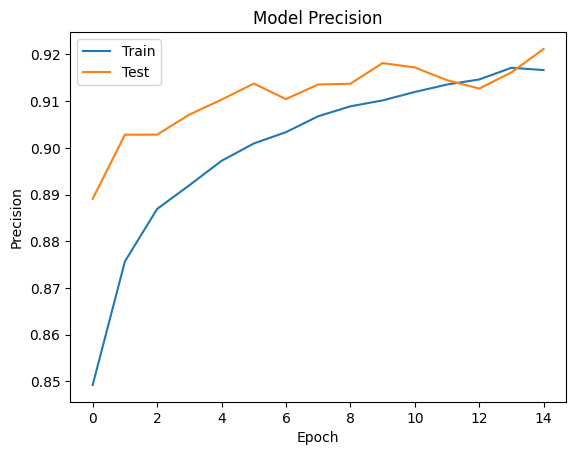

In [ ]:
#summarize history for precision
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()


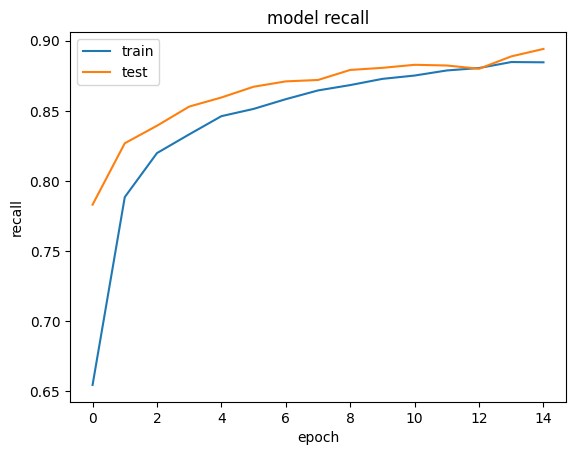

In [ ]:
#summarize history for recall
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

In [ ]:


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Evaluate the model on the test data
score = model.evaluate(x_test, y_test, verbose=0)

# Print the test loss and accuracy
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.27468398213386536
Test accuracy: 0.9020000100135803


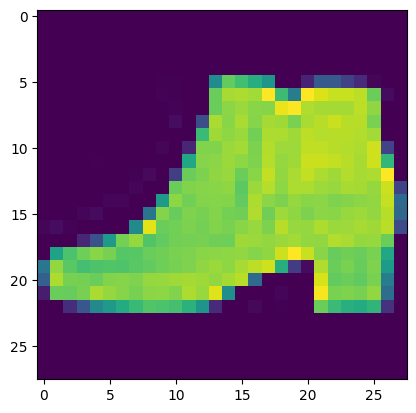

In [ ]:
#svm
import matplotlib.pyplot as plt

plt.imshow(x_train[1089])
plt.show()


In [ ]:
#flattening the data
def flat(data):
  data_ = []

  for i in range(len(data)):
    data_.append(data[1].flatten())

    return data_

In [ ]:
#calling the functions
x_test_ = flat(x_test)
x_train_ =flat(x_train)

In [ ]:
#creating the classes from categorical data
def test_max(data):
  test_c = []
  for i in range(len(data)):
    test_c.append(np.argmax(data[i]))
    return test_c

In [ ]:
y_test_ = test_max(y_test)
y_train_ = test_max(y_train)

In [ ]:
#splitting the data
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=13)

In [ ]:
from sklearn.svm import SVC
import numpy as np

# Convert lists to NumPy arrays
x_train_ = np.array(x_train_)
y_train_ = np.array(y_train_)


In [ ]:
# Check the shape of x_train_ and y_train_
print("x_train_ shape:", x_train_.shape)
print("y_train_ shape:", y_train_.shape)

x_train_ shape: (1, 784)
y_train_ shape: (1,)


In [ ]:
# Check for missing or NaN values in x_train_
print("Missing values in x_train_:", np.isnan(x_train_).any())


Missing values in x_train_: False


In [ ]:
unique_classes = np.unique(y_train_)
print("Unique classes in y_train_:", unique_classes)

Unique classes in y_train_: [9]


In [ ]:
# Verify the labels in y_train_ are properly formatted
print("Unique labels in y_train_:", np.unique(y_train_))


Unique labels in y_train_: [9]
